### Ejemplo Clase

In [1]:
# importar librerias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
url = "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv"
df = pd.read_csv(url)

In [3]:
# Inspeccionar los datos
print(df.head())
print(df.info())

           ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB
None


In [4]:
# Convertir la columna 'ds' en un formato de fecha adecuado
df['ds'] = pd.to_datetime(df['ds'])

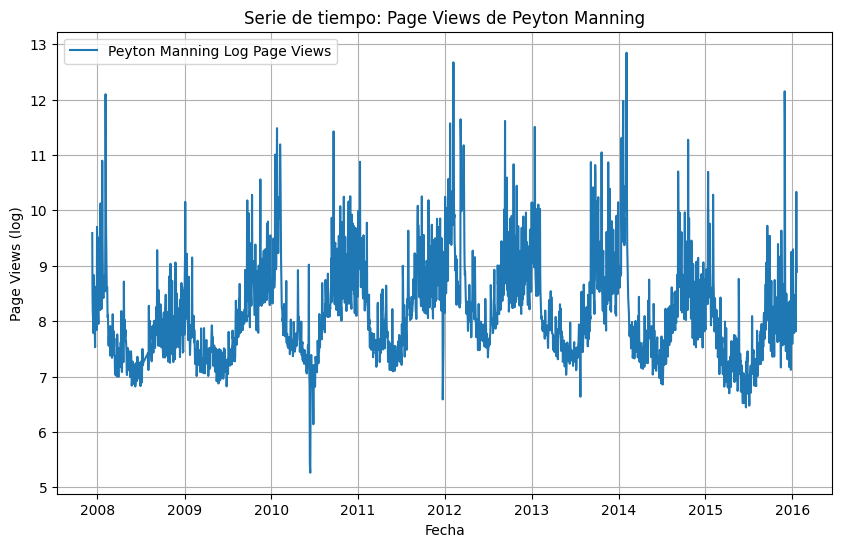

In [5]:
# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Peyton Manning Log Page Views')
plt.title('Serie de tiempo: Page Views de Peyton Manning')
plt.xlabel('Fecha')
plt.ylabel('Page Views (log)')
plt.legend()
plt.grid(True)
plt.show()

## Característica de la serie de tiempo

### Descomposición de la serie de tiempo

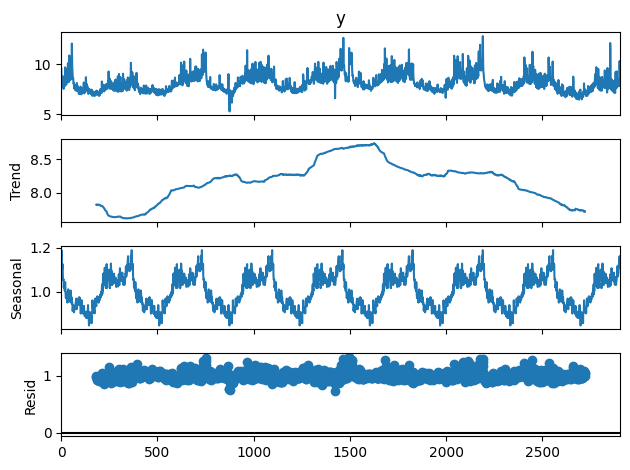

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie de tiempo
result = seasonal_decompose(df['y'], model='multiplicative', period=365)

# Graficar los componentes
result.plot()
plt.show()


## Modelo de la serie de tiempo

In [7]:
pip install prophet


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from prophet import Prophet

# Inicializar el modelo
model = Prophet()

# Ajustar el modelo
model.fit(df)


c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:02:53 - cmdstanpy - INFO - Chain [1] start processing
17:02:54 - cmdstanpy - INFO - Chain [1] done processing


### Generar predicciones

In [9]:
# Crear un DataFrame con las fechas futuras para las predicciones (365 días)
future = model.make_future_dataframe(periods=365)

# Realizar las predicciones
forecast = model.predict(future)

# Inspeccionar el DataFrame de predicciones
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


             ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.206964    7.521522    8.958176
3266 2017-01-16  8.531958    7.772233    9.295756
3267 2017-01-17  8.319376    7.572114    9.096752
3268 2017-01-18  8.151991    7.437712    8.835415
3269 2017-01-19  8.163908    7.426636    8.929583


### Graficar predicciones

c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


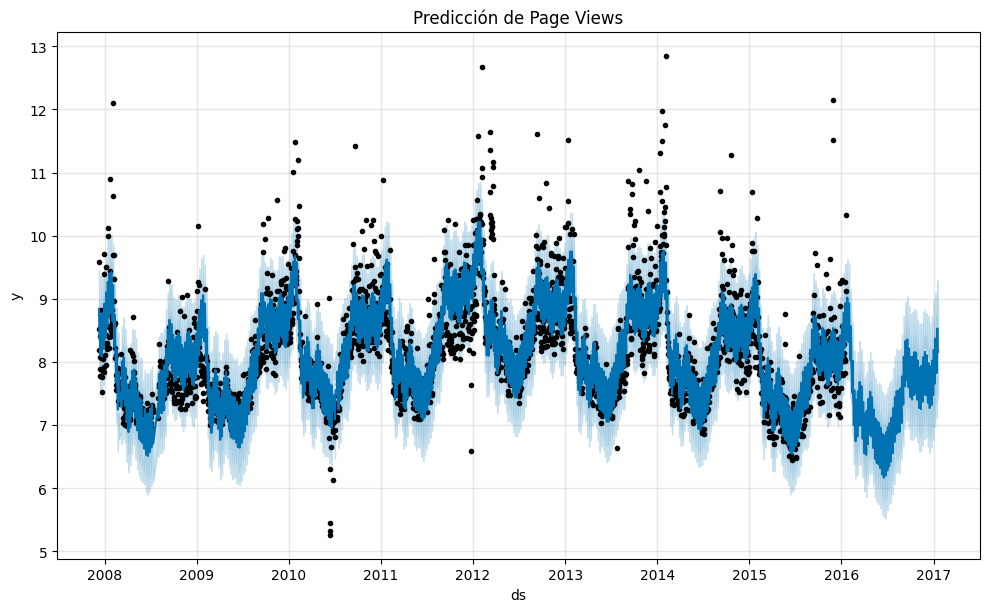

In [10]:
# Graficar las predicciones
model.plot(forecast)
plt.title('Predicción de Page Views')
plt.show()


#### Componentes del modelo

c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

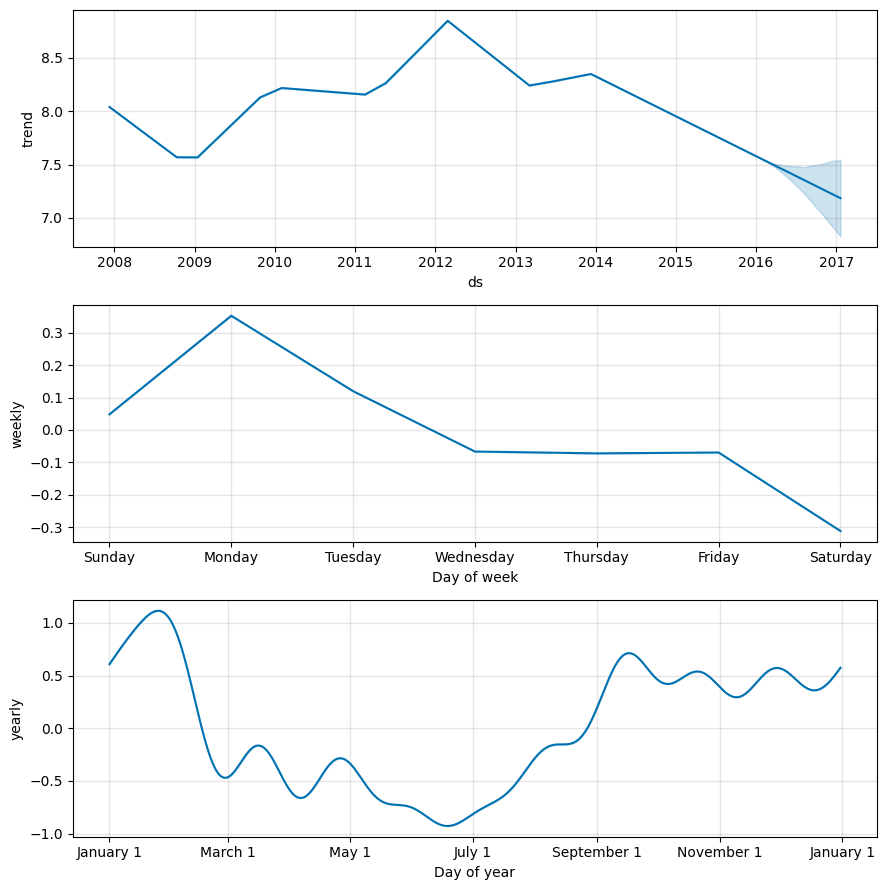

In [11]:
# Graficar los componentes del modelo
model.plot_components(forecast)
plt.show()


### Evaluación del modelo

17:02:58 - cmdstanpy - INFO - Chain [1] start processing
17:02:58 - cmdstanpy - INFO - Chain [1] done processing


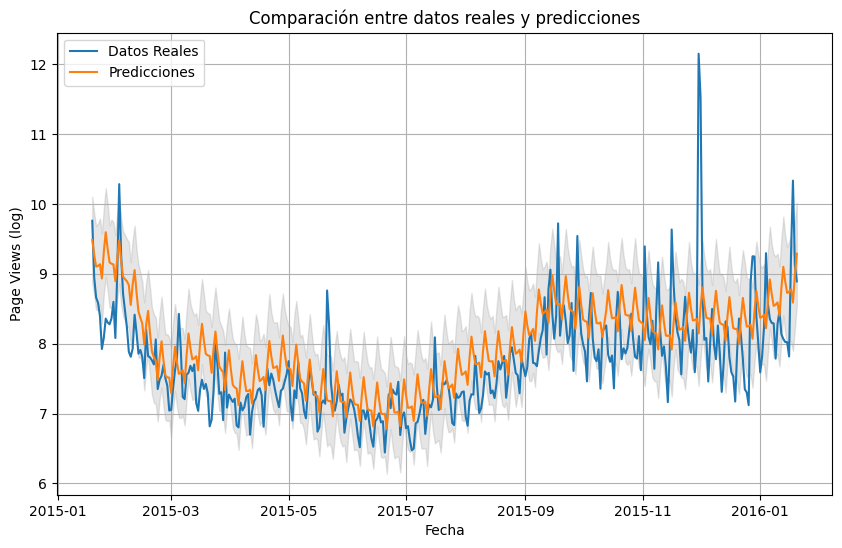

In [12]:
# Dividir en entrenamiento y prueba
train = df.iloc[:-365]
test = df.iloc[-365:]

# Entrenar el modelo con los datos de entrenamiento
model_train = Prophet()
model_train.fit(train)

# Crear predicciones para el conjunto de prueba
future_train = model_train.make_future_dataframe(periods=365)
forecast_train = model_train.predict(future_train)

# Graficar las predicciones contra los datos reales
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Datos Reales')
plt.plot(test['ds'], forecast_train['yhat'][-365:], label='Predicciones')
plt.fill_between(test['ds'], forecast_train['yhat_lower'][-365:], forecast_train['yhat_upper'][-365:], color='gray', alpha=0.2)
plt.title('Comparación entre datos reales y predicciones')
plt.xlabel('Fecha')
plt.ylabel('Page Views (log)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
forecast.to_csv('database.csv',sep=',')
                